In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/housing.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [78]:
df.dropna(inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [80]:
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [82]:
train_data = x_train.join(y_train)

In [83]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9377,-122.49,37.92,26.0,2170.0,347.0,849.0,318.0,6.2953,NEAR BAY,386200.0
19590,-120.85,37.57,27.0,819.0,157.0,451.0,150.0,3.4934,INLAND,193800.0
14244,-117.10,32.70,28.0,633.0,137.0,525.0,170.0,3.6042,NEAR OCEAN,95600.0
2812,-119.03,35.41,41.0,1808.0,435.0,1005.0,373.0,1.7857,INLAND,54300.0
656,-122.14,37.71,18.0,3905.0,1007.0,2197.0,1044.0,3.6932,NEAR BAY,166800.0
...,...,...,...,...,...,...,...,...,...,...
16185,-121.30,37.95,9.0,674.0,242.0,575.0,193.0,2.2024,INLAND,45000.0
5947,-117.86,34.14,33.0,2344.0,363.0,1098.0,359.0,6.2089,INLAND,283400.0
403,-122.26,37.90,52.0,1927.0,279.0,705.0,288.0,7.8864,NEAR BAY,357300.0
4681,-118.34,34.08,52.0,2756.0,542.0,971.0,510.0,5.5871,<1H OCEAN,500001.0


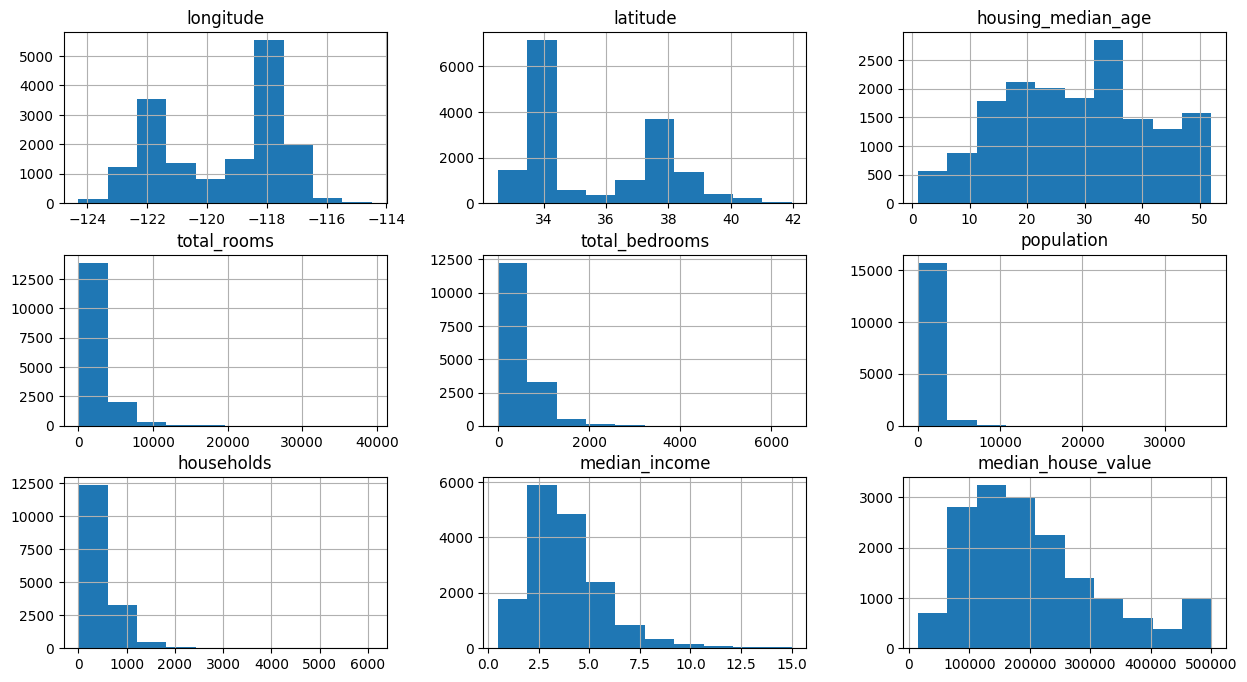

In [84]:
train_data.hist(figsize=(15,8))
plt.show()

In [85]:
train_data.corr()

<ipython-input-85-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925421,-0.105819,0.044695,0.067614,0.099370,0.056183,-0.018377,-0.049919
latitude,-0.925421,1.000000,0.009850,-0.036113,-0.065503,-0.107356,-0.070956,-0.075814,-0.138808
housing_median_age,-0.105819,0.009850,1.000000,-0.360089,-0.320204,-0.296598,-0.304010,-0.118598,0.106341
total_rooms,0.044695,-0.036113,-0.360089,1.000000,0.931190,0.858012,0.920539,0.196369,0.131387
total_bedrooms,0.067614,-0.065503,-0.320204,0.931190,1.000000,0.877945,0.980765,-0.006667,0.047656
population,0.099370,-0.107356,-0.296598,0.858012,0.877945,1.000000,0.906147,0.005187,-0.026165
households,0.056183,-0.070956,-0.304010,0.920539,0.980765,0.906147,1.000000,0.013973,0.062594
median_income,-0.018377,-0.075814,-0.118598,0.196369,-0.006667,0.005187,0.013973,1.000000,0.687044
median_house_value,-0.049919,-0.138808,0.106341,0.131387,0.047656,-0.026165,0.062594,0.687044,1.000000


<ipython-input-86-94cd29a15e09>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


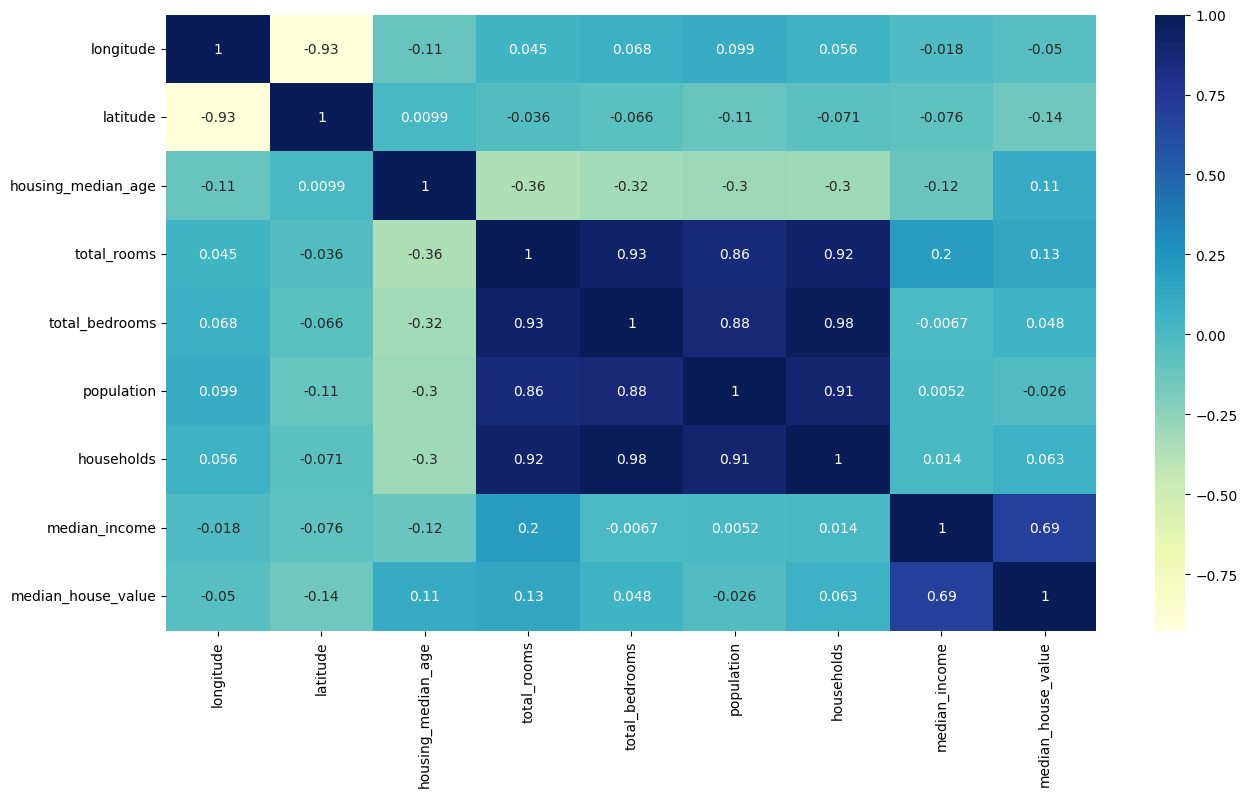

In [86]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Turning the right screwed data graphs into gaussian bell curve we use log to make this and use +1 to get +ve value

In [87]:
train_data['total_rooms'] = np. log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

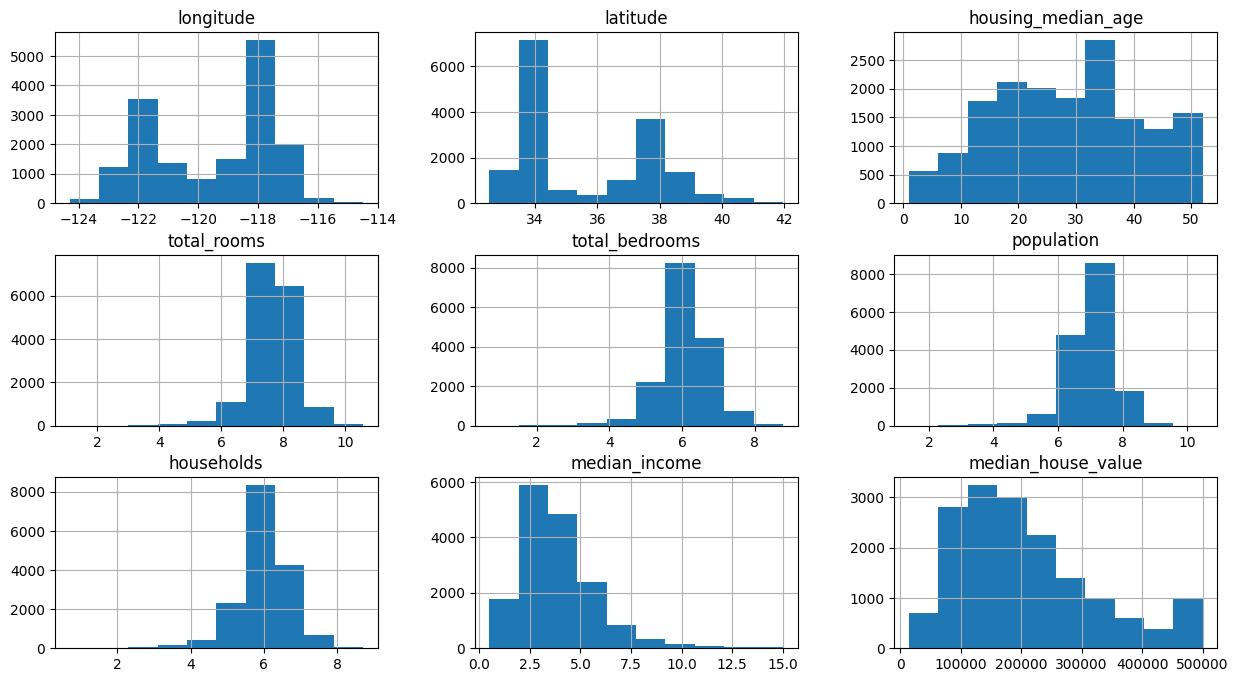

In [88]:
train_data.hist(figsize=(15,8))
plt.show()

In [89]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7267
INLAND        5191
NEAR OCEAN    2084
NEAR BAY      1801
ISLAND           3
Name: ocean_proximity, dtype: int64

### Replacing the categorical values of Ocean proximity column into numerical values

In [90]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

In [91]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9377,-122.49,37.92,26.0,7.682943,5.852202,6.745236,5.765191,6.2953,386200.0,0,0,0,1,0
19590,-120.85,37.57,27.0,6.709304,5.062595,6.113682,5.017280,3.4934,193800.0,0,1,0,0,0
14244,-117.10,32.70,28.0,6.452049,4.927254,6.265301,5.141664,3.6042,95600.0,0,0,0,0,1
2812,-119.03,35.41,41.0,7.500529,6.077642,6.913737,5.924256,1.7857,54300.0,0,1,0,0,0
656,-122.14,37.71,18.0,8.270269,6.915723,7.695303,6.951772,3.6932,166800.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16185,-121.30,37.95,9.0,6.514713,5.493061,6.356108,5.267858,2.2024,45000.0,0,1,0,0,0
5947,-117.86,34.14,33.0,7.760041,5.897154,7.002156,5.886104,6.2089,283400.0,0,1,0,0,0
403,-122.26,37.90,52.0,7.564238,5.634790,6.559615,5.666427,7.8864,357300.0,0,0,0,1,0
4681,-118.34,34.08,52.0,7.921898,6.297109,6.879356,6.236370,5.5871,500001.0,1,0,0,0,0


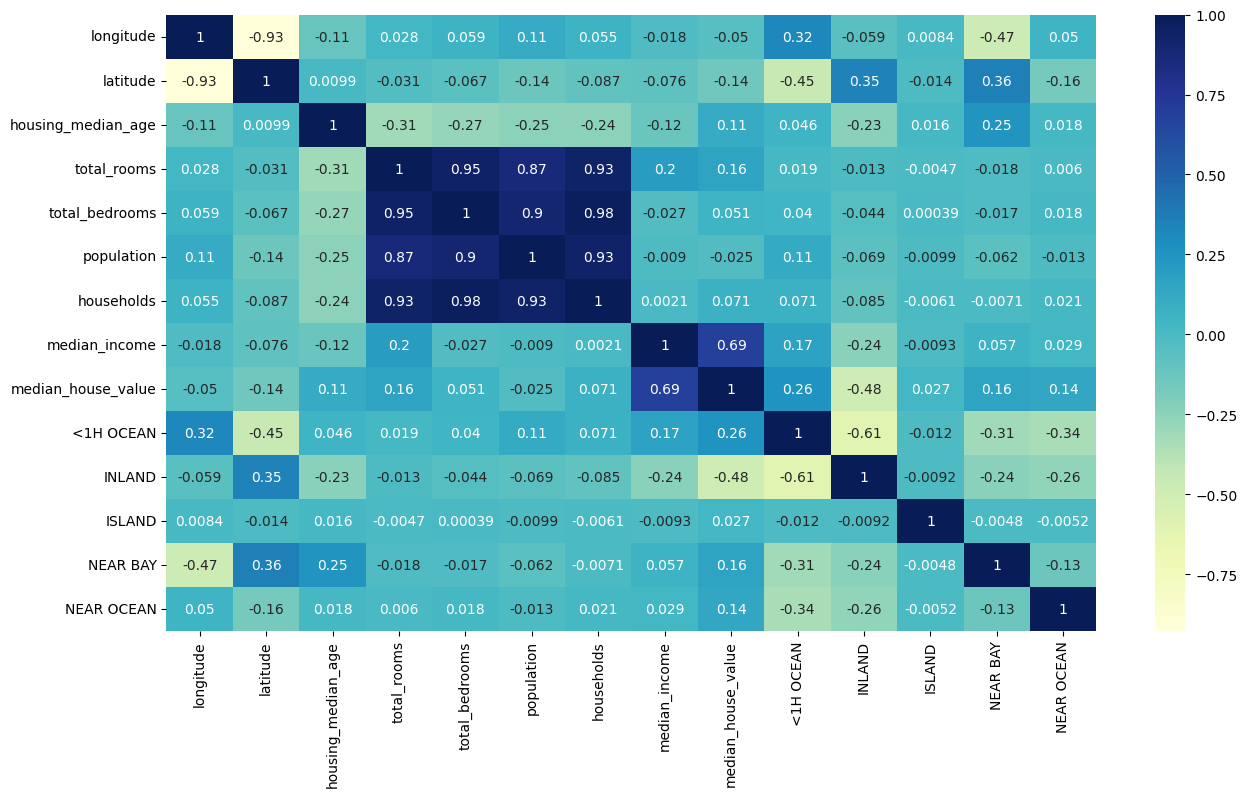

In [92]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

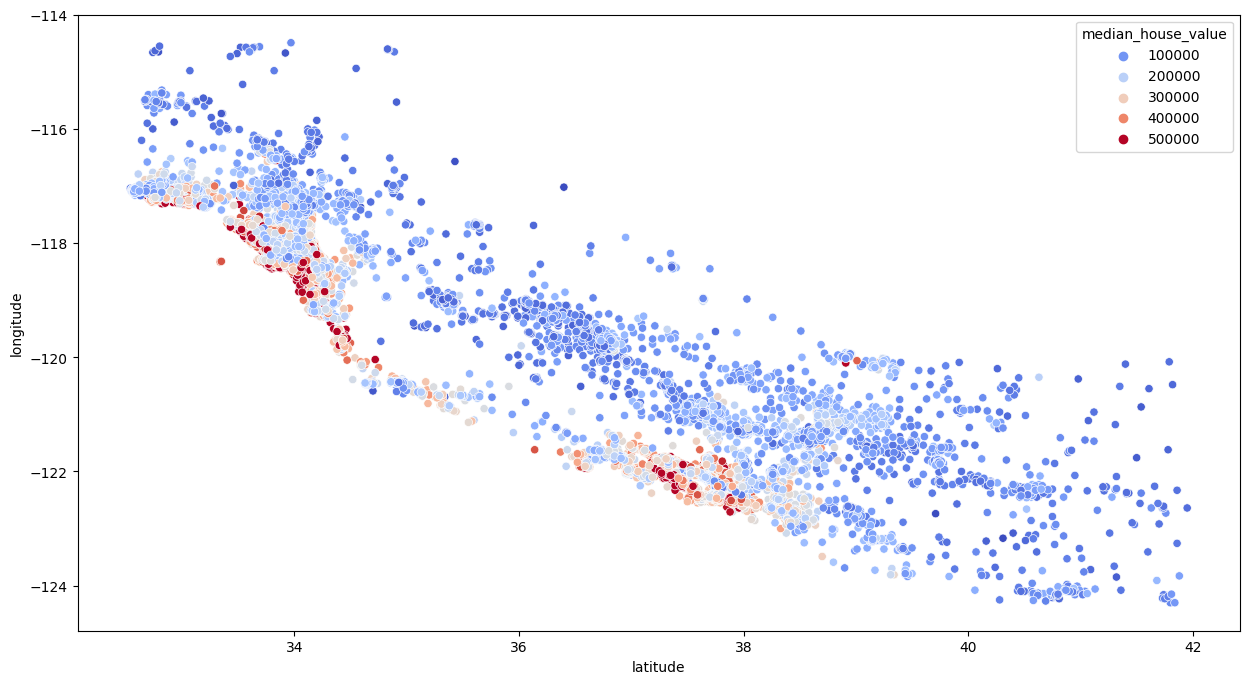

In [93]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
plt.show()

Houses which are near the Shore has a high house price when compared to the Inland houses.

# Feature Engineering

In [94]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

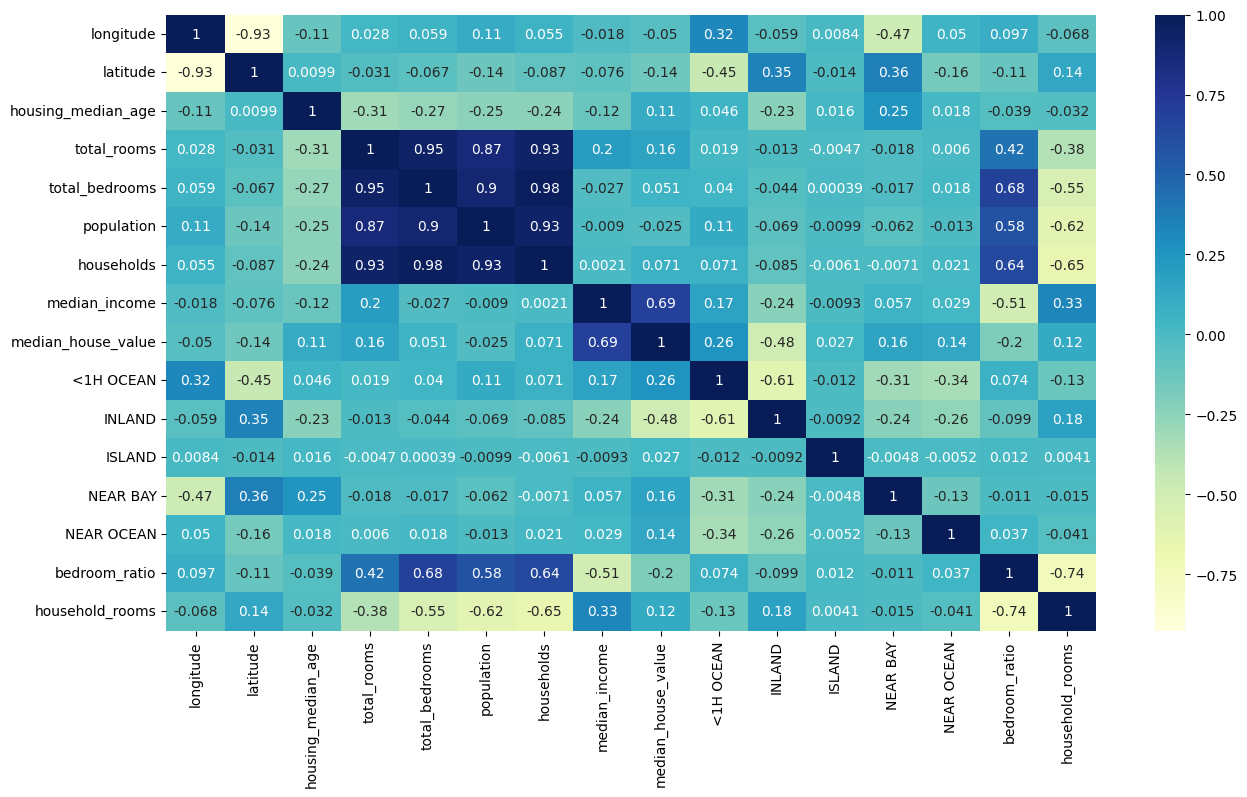

In [95]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)



LinearRegression()

### LinearRegression()

In [97]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [98]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [99]:
x_test_s = scaler.transform(x_test)

In [100]:
reg.score(x_test_s, y_test)

0.6853251973247589

### Random Forest()

In [101]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [102]:
forest.score(x_test_s, y_test)

0.8295300182260509

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [104]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [105]:
grid_search.best_estimator_.score(x_test_s,y_test)

0.8298321486261955

In [110]:
# Install necessary packages
!apt-get install -y texlive-xetex
!apt-get install -y texlive-fonts-recommended
!apt-get install -y texlive-generic-recommended
!apt-get install -y pandoc

# Install Python package for pandoc
!pip install pypandoc

# Convert Colab notebook to PDF
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/House Price Prediction.ipynb"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/House Price Prediction.ipynb to PDF
[NbConvertApp] Support files will be in House Price Predict